In [2]:
!mkdir data

In [10]:
# More imports
from tensorflow.keras.layers import Input, Dense, Flatten
from tensorflow.keras.applications.vgg16 import VGG16 as PretrainedModel, \
  preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from glob import glob

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys, os

In [11]:
train_path = 'data/train'
valid_path = 'data/test'

In [12]:
train_path

'data/train'

In [13]:
IMAGE_SIZE = [200, 200]

In [14]:
image_files = glob(train_path + '/*/*.jpg')
valid_image_files = glob(valid_path + '/*/*.jpg')

In [15]:
folders = glob(train_path + '/*')
folders

['data/train\\food', 'data/train\\nonfood']

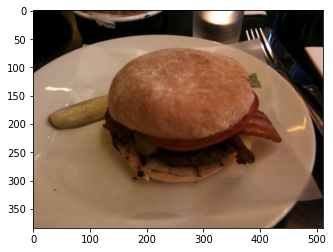

In [16]:
plt.imshow(image.load_img(np.random.choice(image_files)))
plt.show()

In [17]:
ptm = PretrainedModel(
    input_shape=IMAGE_SIZE + [3],
    weights='imagenet',
    include_top=False)

58892288/58889256 [==============================] - 2s 0us/step


In [18]:
ptm.trainable = False

In [19]:
K = len(folders) # number of classes
x = Flatten()(ptm.output)
x = Dense(K, activation='softmax')(x)

In [20]:

model = Model(inputs=ptm.input, outputs=x)

In [21]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 200, 200, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 200, 200, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 200, 200, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 100, 100, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 100, 100, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 100, 100, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 50, 50, 128)       0     

In [22]:
# create an instance of ImageDataGenerator
gen_train = ImageDataGenerator(
  rotation_range=20,
  width_shift_range=0.1,
  height_shift_range=0.1,
  shear_range=0.1,
  zoom_range=0.2,
  horizontal_flip=True,
  preprocessing_function=preprocess_input
)

gen_test = ImageDataGenerator(
  preprocessing_function=preprocess_input
)

In [23]:
batch_size = 128

# create generators
train_generator = gen_train.flow_from_directory(
  train_path,
  shuffle=True,
  target_size=IMAGE_SIZE,
  batch_size=batch_size,
)
valid_generator = gen_test.flow_from_directory(
  valid_path,
  target_size=IMAGE_SIZE,
  batch_size=batch_size,
)

Found 3000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [24]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [25]:

r = model.fit_generator(
  train_generator,
  validation_data=valid_generator,
  epochs=10,
  steps_per_epoch=int(np.ceil(len(image_files) / batch_size)),
  validation_steps=int(np.ceil(len(valid_image_files) / batch_size)),
)

C:\Users\SUNNY\.conda\envs\Tensorflow\lib\site-packages\tensorflow\python\keras\engine\training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
24/24 [==============================] - 45s 1s/step - loss: 1.5156 - accuracy: 0.9227 - val_loss: 0.5417 - val_accuracy: 0.9790
Epoch 2/10
24/24 [==============================] - 19s 798ms/step - loss: 0.5334 - accuracy: 0.9750 - val_loss: 0.5142 - val_accuracy: 0.9830
Epoch 3/10
24/24 [==============================] - 20s 836ms/step - loss: 0.3033 - accuracy: 0.9840 - val_loss: 0.3713 - val_accuracy: 0.9850
Epoch 4/10
24/24 [==============================] - 20s 815ms/step - loss: 0.3002 - accuracy: 0.9860 - val_loss: 0.4602 - val_accuracy: 0.9810
Epoch 5/10
24/24 [==============================] - 21s 866ms/step - loss: 0.1774 - accuracy: 0.9883 - val_loss: 0.6689 - val_accuracy: 0.9790
Epoch 6/10
24/24 [==============================] - 22s 927ms/step - loss: 0.2288 - accuracy: 0.9870 - val_loss: 0.5762 - val_accuracy: 0.9780
Epoch 7/10
24/24 [==============================] - 21s 859ms/step - loss: 0.2231 - accuracy: 0.9887 - val_loss: 0.6266 - val_accuracy: 0.9810
Ep

In [26]:
# create a 2nd train generator which does not use data augmentation
# to get the true train accuracy
train_generator2 = gen_test.flow_from_directory(
  train_path,
  target_size=IMAGE_SIZE,
  batch_size=batch_size,
)
model.evaluate_generator(
    train_generator2,
    steps=int(np.ceil(len(image_files) / batch_size)))

Found 3000 images belonging to 2 classes.


C:\Users\SUNNY\.conda\envs\Tensorflow\lib\site-packages\tensorflow\python\keras\engine\training.py:1973: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


[0.036375291645526886, 0.9976666569709778]

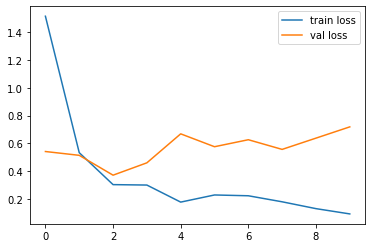

In [27]:
# loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()

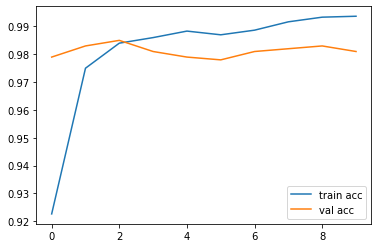

In [28]:
# accuracies
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()